In [235]:
import pandas as pd
import numpy as np
import sqldf
import matplotlib.pyplot as plt
from google.oauth2.service_account import Credentials

In [236]:
#подгружаем все и приводим всё в рабочий вид

In [237]:
transactions = pd.read_csv (r"C:\Users\nignatiev\Desktop\data-pari\xlsx\test\transactions.csv", sep=';')

In [238]:
transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,standard_cost
0,1,2,2950,25.02.2017,ЛОЖЬ,Approved,Solex,Standard,$53.62
1,2,3,3120,21.05.2017,ИСТИНА,Approved,Trek Bicycles,Standard,$388.92
2,3,37,402,16.10.2017,ЛОЖЬ,Approved,OHM Cycles,Standard,$248.82
3,4,88,3135,31.08.2017,ЛОЖЬ,Approved,Norco Bicycles,Standard,$381.10
4,5,78,787,01.10.2017,ИСТИНА,Approved,Giant Bicycles,Standard,$709.48
...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,24.06.2017,ИСТИНА,Approved,OHM Cycles,Standard,$1203.40
19996,19997,41,127,09.11.2017,ИСТИНА,Approved,Solex,Road,$312.74
19997,19998,87,2284,14.04.2017,ИСТИНА,Approved,OHM Cycles,Standard,$44.71
19998,19999,6,2764,03.07.2017,ЛОЖЬ,Approved,OHM Cycles,Standard,$136.73


In [239]:
transactions['standard_cost'] = transactions['standard_cost'].str.replace('$', '', regex=False)

In [240]:
customers = pd.read_csv (r"C:\Users\nignatiev\Desktop\data-pari\xlsx\test\customers.csv", sep=';')

In [241]:
customers['age'] = customers['age'].astype(int)

In [242]:
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'], infer_datetime_format=True)

In [243]:
#вывод нужных значенией для дальнейшей аналитики

In [244]:
query = """
SELECT     
    transactions.customer_id,
    transactions.transaction_date,
    MAX(transactions.transaction_date) OVER(partition by transactions.customer_id) AS max_date, -- поиск минимальной даты транзакции
    MIN(transactions.transaction_date) OVER(partition by transactions.customer_id) AS min_date, -- поиск максимальной даты транзакции
    transactions.brand,
    customers.wealth_segment,
    transactions.standard_cost
FROM transactions
INNER JOIN customers ON transactions.customer_id = customers.customer_id
WHERE order_status = 'Approved' AND standard_cost IS NOT NULL
ORDER BY transactions.customer_id
"""

In [245]:
df_view = sqldf.run(query)

In [246]:
df_view

,customer_id,transaction_date,max_date,min_date,brand,wealth_segment,standard_cost
0,1,2017-12-23 00:00:00,2017-12-23 00:00:00,2017-01-05 00:00:00,OHM Cycles,Mass Customer,125.07
1,1,2017-04-06 00:00:00,2017-12-23 00:00:00,2017-01-05 00:00:00,Solex,Mass Customer,826.51
2,1,2017-05-11 00:00:00,2017-12-23 00:00:00,2017-01-05 00:00:00,Trek Bicycles,Mass Customer,1531.42
3,1,2017-01-05 00:00:00,2017-12-23 00:00:00,2017-01-05 00:00:00,Norco Bicycles,Mass Customer,270.30
4,1,2017-02-21 00:00:00,2017-12-23 00:00:00,2017-01-05 00:00:00,Solex,Mass Customer,53.62
...,...,...,...,...,...,...,...
19609,3500,2017-01-09 00:00:00,2017-08-08 00:00:00,2017-01-09 00:00:00,Giant Bicycles,Affluent Customer,594.68
19610,3500,2017-02-16 00:00:00,2017-08-08 00:00:00,2017-01-09 00:00:00,WeareA2B,Affluent Customer,400.91
19611,3500,2017-08-08 00:00:00,2017-08-08 00:00:00,2017-01-09 00:00:00,Giant Bicycles,Affluent Customer,1167.18
19612,3500,2017-01-11 00:00:00,2017-08-08 00:00:00,2017-01-09 00:00:00,WeareA2B,Affluent Customer,45.26


In [247]:
#перевод дат в месяца, т.к. нам нужно работать с месяцами

In [248]:
df_view['transaction_date'] = pd.DatetimeIndex(df_view['transaction_date']).month

In [249]:
df_view['max_date'] = pd.DatetimeIndex(df_view['max_date']).month

In [250]:
df_view['min_date'] = pd.DatetimeIndex(df_view['min_date']).month

In [251]:
df_view

,customer_id,transaction_date,max_date,min_date,brand,wealth_segment,standard_cost
0,1,12,12,1,OHM Cycles,Mass Customer,125.07
1,1,4,12,1,Solex,Mass Customer,826.51
2,1,5,12,1,Trek Bicycles,Mass Customer,1531.42
3,1,1,12,1,Norco Bicycles,Mass Customer,270.30
4,1,2,12,1,Solex,Mass Customer,53.62
...,...,...,...,...,...,...,...
19609,3500,1,8,1,Giant Bicycles,Affluent Customer,594.68
19610,3500,2,8,1,WeareA2B,Affluent Customer,400.91
19611,3500,8,8,1,Giant Bicycles,Affluent Customer,1167.18
19612,3500,1,8,1,WeareA2B,Affluent Customer,45.26


In [252]:
#подсчет разницы дат

In [253]:
df_view['date_difference'] = df_view['transaction_date'] - df_view['min_date']

In [254]:
df_view

,customer_id,transaction_date,max_date,min_date,brand,wealth_segment,standard_cost,date_difference
0,1,12,12,1,OHM Cycles,Mass Customer,125.07,11
1,1,4,12,1,Solex,Mass Customer,826.51,3
2,1,5,12,1,Trek Bicycles,Mass Customer,1531.42,4
3,1,1,12,1,Norco Bicycles,Mass Customer,270.30,0
4,1,2,12,1,Solex,Mass Customer,53.62,1
...,...,...,...,...,...,...,...,...
19609,3500,1,8,1,Giant Bicycles,Affluent Customer,594.68,0
19610,3500,2,8,1,WeareA2B,Affluent Customer,400.91,1
19611,3500,8,8,1,Giant Bicycles,Affluent Customer,1167.18,7
19612,3500,1,8,1,WeareA2B,Affluent Customer,45.26,0


In [255]:
#сохраним датафрейм, т.к. он пригодится позже 

In [256]:
df_view_churn = df_view

In [257]:
df_view_payback = df_view

In [258]:
#создание pivot-табоички с аггрегацией по min_date и date_difference + подсчетов количества уникальных айди

In [259]:
rr = df_view.pivot_table(index = ['min_date','date_difference'], 
                         aggfunc = {'customer_id':'nunique'}).reset_index() 

In [260]:
rr

,min_date,date_difference,customer_id
0,1,0,1333
1,1,1,478
2,1,2,493
3,1,3,486
4,1,4,480
...,...,...,...
73,10,1,6
74,10,2,8
75,11,0,13
76,11,1,5


In [261]:
#выбрать строки, в которых столбец 'date_difference' равен 0 и выбрать только столбцы 'min_date' и 'customer_id' из полученной таблички

In [262]:
initial_users_count = rr[rr['date_difference'] == 0]
initial_users_count = initial_users_count[['min_date','customer_id']]

In [263]:
#RR наших клиентов из месяца в месяц
initial_users_count

,min_date,customer_id
0,1,1333
12,2,801
23,3,483
33,4,343
42,5,214
50,6,125
57,7,78
63,8,51
68,9,24
72,10,20


In [264]:
#подсчет LTV клента на 6 месяц жизни

In [265]:
df_view



,customer_id,transaction_date,max_date,min_date,brand,wealth_segment,standard_cost,date_difference
0,1,12,12,1,OHM Cycles,Mass Customer,125.07,11
1,1,4,12,1,Solex,Mass Customer,826.51,3
2,1,5,12,1,Trek Bicycles,Mass Customer,1531.42,4
3,1,1,12,1,Norco Bicycles,Mass Customer,270.30,0
4,1,2,12,1,Solex,Mass Customer,53.62,1
...,...,...,...,...,...,...,...,...
19609,3500,1,8,1,Giant Bicycles,Affluent Customer,594.68,0
19610,3500,2,8,1,WeareA2B,Affluent Customer,400.91,1
19611,3500,8,8,1,Giant Bicycles,Affluent Customer,1167.18,7
19612,3500,1,8,1,WeareA2B,Affluent Customer,45.26,0


In [266]:
query = """
SELECT customer_id, standard_cost, date_difference
FROM df_view
WHERE customer_id IN
(SELECT customer_id
FROM df_view
WHERE date_difference >= 5 -- поиск айдишек, где разница между минимальным и максимальным месяцем 6+ месяцев, 1 месяц = 0
GROUP BY customer_id)
"""

In [267]:
df_view = sqldf.run(query)

In [268]:
df_view

,customer_id,standard_cost,date_difference
0,1,125.07,11
1,1,826.51,3
2,1,1531.42,4
3,1,270.30,0
4,1,53.62,1
...,...,...,...
18196,3500,594.68,0
18197,3500,400.91,1
18198,3500,1167.18,7
18199,3500,45.26,0


In [269]:
#подсчет LTV6 в запросе

In [270]:
query = """
SELECT customer_id, SUM(standard_cost) AS LTV6
FROM df_view
WHERE date_difference <= 5
GROUP BY customer_id
"""

In [271]:
df_view = sqldf.run(query)

In [272]:
df_view

,customer_id,LTV6
0,1,5100.71
1,3,3540.63
2,5,2925.78
3,6,1033.27
4,8,1915.33
...,...,...
3026,3494,1537.95
3027,3495,3671.47
3028,3498,1954.47
3029,3499,2341.39


In [273]:
#2 задача
df_view_ltv6 = df_view

In [274]:
#подсчет Churn rate на 9 месяц жизни клиента
#формула для подсчета — (C1 - C2) * 100 / C1

In [275]:
df_view_churn

,customer_id,transaction_date,max_date,min_date,brand,wealth_segment,standard_cost,date_difference
0,1,12,12,1,OHM Cycles,Mass Customer,125.07,11
1,1,4,12,1,Solex,Mass Customer,826.51,3
2,1,5,12,1,Trek Bicycles,Mass Customer,1531.42,4
3,1,1,12,1,Norco Bicycles,Mass Customer,270.30,0
4,1,2,12,1,Solex,Mass Customer,53.62,1
...,...,...,...,...,...,...,...,...
19609,3500,1,8,1,Giant Bicycles,Affluent Customer,594.68,0
19610,3500,2,8,1,WeareA2B,Affluent Customer,400.91,1
19611,3500,8,8,1,Giant Bicycles,Affluent Customer,1167.18,7
19612,3500,1,8,1,WeareA2B,Affluent Customer,45.26,0


In [276]:
#подсчет (С1 - С2)

In [277]:
query = """
SELECT DISTINCT
(SELECT COUNT(customer_id) FROM df_view_churn WHERE date_difference = 0) AS month_1_users,
(SELECT COUNT(customer_id) FROM df_view_churn WHERE date_difference = 0) - (SELECT COUNT(customer_id) FROM df_view_churn WHERE date_difference = 0) AS mon_1,
(SELECT COUNT(customer_id) FROM df_view_churn WHERE date_difference = 0) - (SELECT COUNT(customer_id) FROM df_view_churn WHERE date_difference = 1) AS mon_2,
(SELECT COUNT(customer_id) FROM df_view_churn WHERE date_difference = 0) - (SELECT COUNT(customer_id) FROM df_view_churn WHERE date_difference = 2) AS mon_3,
(SELECT COUNT(customer_id) FROM df_view_churn WHERE date_difference = 0) - (SELECT COUNT(customer_id) FROM df_view_churn WHERE date_difference = 3) AS mon_4,
(SELECT COUNT(customer_id) FROM df_view_churn WHERE date_difference = 0) - (SELECT COUNT(customer_id) FROM df_view_churn WHERE date_difference = 4) AS mon_5,
(SELECT COUNT(customer_id) FROM df_view_churn WHERE date_difference = 0) - (SELECT COUNT(customer_id) FROM df_view_churn WHERE date_difference = 5) AS mon_6,
(SELECT COUNT(customer_id) FROM df_view_churn WHERE date_difference = 0) - (SELECT COUNT(customer_id) FROM df_view_churn WHERE date_difference = 6) AS mon_7,
(SELECT COUNT(customer_id) FROM df_view_churn WHERE date_difference = 0) - (SELECT COUNT(customer_id) FROM df_view_churn WHERE date_difference = 7) AS mon_8,
(SELECT COUNT(customer_id) FROM df_view_churn WHERE date_difference = 0) - (SELECT COUNT(customer_id) FROM df_view_churn WHERE date_difference = 8) AS mon_9
FROM df_view_churn;
"""

In [278]:
df_view_churn = sqldf.run(query)

In [279]:
df_view_churn

,month_1_users,mon_1,mon_2,mon_3,mon_4,mon_5,mon_6,mon_7,mon_8,mon_9
0,4366,0,2772,2768,2711,2785,2877,2773,2841,2976


In [280]:
#преобразование в (C1 - C2) * 100 / C1

In [281]:
df_view_churn['mon_1'] = 0,
df_view_churn['mon_2'] = ((df_view_churn['mon_2'] - df_view_churn['month_1_users']) * 100) / df_view_churn['mon_2']
df_view_churn['mon_3'] = ((df_view_churn['mon_3'] - df_view_churn['month_1_users']) * 100) / df_view_churn['mon_3']
df_view_churn['mon_4'] = ((df_view_churn['mon_4'] - df_view_churn['month_1_users']) * 100) / df_view_churn['mon_4']
df_view_churn['mon_5'] = ((df_view_churn['mon_5'] - df_view_churn['month_1_users']) * 100) / df_view_churn['mon_5']
df_view_churn['mon_6'] = ((df_view_churn['mon_6'] - df_view_churn['month_1_users']) * 100) / df_view_churn['mon_6']
df_view_churn['mon_7'] = ((df_view_churn['mon_7'] - df_view_churn['month_1_users']) * 100) / df_view_churn['mon_7']
df_view_churn['mon_8'] = ((df_view_churn['mon_8'] - df_view_churn['month_1_users']) * 100) / df_view_churn['mon_8']
df_view_churn['mon_9'] = ((df_view_churn['mon_9'] - df_view_churn['month_1_users']) * 100) / df_view_churn['mon_9']

In [282]:
df_view_churn = pd.concat([df_view_churn['mon_1'], df_view_churn.loc[:, 'mon_2':'mon_9']], axis=1)

In [283]:
#3 задача
df_view_churn

,mon_1,mon_2,mon_3,mon_4,mon_5,mon_6,mon_7,mon_8,mon_9
0,0,-57.503608,-57.731214,-61.047584,-56.768402,-51.755301,-57.446809,-53.678282,-46.706989


In [284]:
# через сколько в среднем окупается клиент каждого из segment

In [285]:
df_view_payback

,customer_id,transaction_date,max_date,min_date,brand,wealth_segment,standard_cost,date_difference
0,1,12,12,1,OHM Cycles,Mass Customer,125.07,11
1,1,4,12,1,Solex,Mass Customer,826.51,3
2,1,5,12,1,Trek Bicycles,Mass Customer,1531.42,4
3,1,1,12,1,Norco Bicycles,Mass Customer,270.30,0
4,1,2,12,1,Solex,Mass Customer,53.62,1
...,...,...,...,...,...,...,...,...
19609,3500,1,8,1,Giant Bicycles,Affluent Customer,594.68,0
19610,3500,2,8,1,WeareA2B,Affluent Customer,400.91,1
19611,3500,8,8,1,Giant Bicycles,Affluent Customer,1167.18,7
19612,3500,1,8,1,WeareA2B,Affluent Customer,45.26,0


In [286]:
#подсчет маржинальности

In [287]:
df_view_payback['Margin'] = df_view_payback['standard_cost']

In [288]:
df_view_payback['Margin'] = pd.to_numeric(df_view_payback['Margin'], errors='coerce')

In [289]:
df_view_payback['Margin'] = df_view_payback['Margin'] * 0.1

In [290]:
df_view_payback

,customer_id,transaction_date,max_date,min_date,brand,wealth_segment,standard_cost,date_difference,Margin
0,1,12,12,1,OHM Cycles,Mass Customer,125.07,11,12.507
1,1,4,12,1,Solex,Mass Customer,826.51,3,82.651
2,1,5,12,1,Trek Bicycles,Mass Customer,1531.42,4,153.142
3,1,1,12,1,Norco Bicycles,Mass Customer,270.30,0,27.030
4,1,2,12,1,Solex,Mass Customer,53.62,1,5.362
...,...,...,...,...,...,...,...,...,...
19609,3500,1,8,1,Giant Bicycles,Affluent Customer,594.68,0,59.468
19610,3500,2,8,1,WeareA2B,Affluent Customer,400.91,1,40.091
19611,3500,8,8,1,Giant Bicycles,Affluent Customer,1167.18,7,116.718
19612,3500,1,8,1,WeareA2B,Affluent Customer,45.26,0,4.526


In [291]:
query = """
SELECT 
    customer_id, 
    transaction_date, 
    max_date, 
    min_date, 
    standard_cost, 
    brand,
    wealth_segment,
    date_difference, 
    Margin,
    SUM(Margin) OVER (PARTITION BY customer_id ORDER BY transaction_date) as sum -- маржа по айдишке по месяцу
FROM df_view_payback
"""

In [292]:
df_view_payback = sqldf.run(query)

In [293]:
df_view_payback

,customer_id,transaction_date,max_date,min_date,standard_cost,brand,wealth_segment,date_difference,Margin,sum
0,1,1,12,1,270.30,Norco Bicycles,Mass Customer,0,27.030,27.030
1,1,2,12,1,53.62,Solex,Mass Customer,1,5.362,32.392
2,1,3,12,1,612.88,Norco Bicycles,Mass Customer,2,61.288,170.176
3,1,3,12,1,764.96,Giant Bicycles,Mass Customer,2,76.496,170.176
4,1,4,12,1,826.51,Solex,Mass Customer,3,82.651,252.827
...,...,...,...,...,...,...,...,...,...,...
19609,3500,1,8,1,45.26,WeareA2B,Affluent Customer,0,4.526,63.994
19610,3500,2,8,1,400.91,WeareA2B,Affluent Customer,1,40.091,104.085
19611,3500,3,8,1,874.90,OHM Cycles,Affluent Customer,2,87.490,191.575
19612,3500,4,8,1,53.62,Solex,Affluent Customer,3,5.362,196.937


In [294]:
#фильтр по пользователям, которые себя окупают (или привлечение больше-равно 150 долларов)

In [295]:
query = """
SELECT 
    customer_id, 
    transaction_date, 
    max_date, 
    min_date, 
    standard_cost, 
    date_difference,
    brand,
    wealth_segment,
    Margin,
    sum,
    MIN(sum) OVER (PARTITION BY customer_id ORDER BY transaction_date) AS min_sum_150 -- выбор минимальной суммы больше суммы окупаемости
FROM df_view_payback
WHERE sum >= 150.0
"""

In [296]:
df_view_payback = sqldf.run(query)

In [297]:
df_view_payback

,customer_id,transaction_date,max_date,min_date,standard_cost,date_difference,brand,wealth_segment,Margin,sum,min_sum_150
0,1,3,12,1,612.88,2,Norco Bicycles,Mass Customer,61.288,170.176,170.176
1,1,3,12,1,764.96,2,Giant Bicycles,Mass Customer,76.496,170.176,170.176
2,1,4,12,1,826.51,3,Solex,Mass Customer,82.651,252.827,170.176
3,1,5,12,1,1531.42,4,Trek Bicycles,Mass Customer,153.142,488.934,170.176
4,1,5,12,1,829.65,4,Giant Bicycles,Mass Customer,82.965,488.934,170.176
...,...,...,...,...,...,...,...,...,...,...,...
12287,3499,6,11,1,954.82,5,Giant Bicycles,Mass Customer,95.482,234.139,234.139
12288,3499,11,11,1,376.84,10,Norco Bicycles,Mass Customer,37.684,271.823,234.139
12289,3500,3,8,1,874.90,2,OHM Cycles,Affluent Customer,87.490,191.575,191.575
12290,3500,4,8,1,53.62,3,Solex,Affluent Customer,5.362,196.937,191.575


In [298]:
df_view_payback_brand = df_view_payback

In [299]:
query = """
SELECT 
    wealth_segment,
    AVG(date_difference) AS average_payback
FROM df_view_payback
WHERE sum = min_sum_150
GROUP BY wealth_segment
"""

In [300]:
df_view_payback = sqldf.run(query)

In [301]:
#через сколько в среднем окупается клиент каждого из segment в месяцах

In [302]:
df_view_payback

,wealth_segment,average_payback
0,Affluent Customer,3.821727
1,High Net Worth,3.727110
2,Mass Customer,3.602334


In [303]:
#какой brand окупается дольше всего

In [304]:
df_view_payback_brand

,customer_id,transaction_date,max_date,min_date,standard_cost,date_difference,brand,wealth_segment,Margin,sum,min_sum_150
0,1,3,12,1,612.88,2,Norco Bicycles,Mass Customer,61.288,170.176,170.176
1,1,3,12,1,764.96,2,Giant Bicycles,Mass Customer,76.496,170.176,170.176
2,1,4,12,1,826.51,3,Solex,Mass Customer,82.651,252.827,170.176
3,1,5,12,1,1531.42,4,Trek Bicycles,Mass Customer,153.142,488.934,170.176
4,1,5,12,1,829.65,4,Giant Bicycles,Mass Customer,82.965,488.934,170.176
...,...,...,...,...,...,...,...,...,...,...,...
12287,3499,6,11,1,954.82,5,Giant Bicycles,Mass Customer,95.482,234.139,234.139
12288,3499,11,11,1,376.84,10,Norco Bicycles,Mass Customer,37.684,271.823,234.139
12289,3500,3,8,1,874.90,2,OHM Cycles,Affluent Customer,87.490,191.575,191.575
12290,3500,4,8,1,53.62,3,Solex,Affluent Customer,5.362,196.937,191.575


In [305]:
query = """
SELECT 
    brand,
    AVG(date_difference) AS average_payback_brand
FROM df_view_payback_brand
WHERE sum = min_sum_150
GROUP BY brand
"""

In [306]:
df_view_payback_brand = sqldf.run(query)

In [307]:
#через сколько в среднем окупается brand в месяцах

In [308]:
df_view_payback_brand

,brand,average_payback_brand
0,Giant Bicycles,3.710615
1,Norco Bicycles,3.845714
2,OHM Cycles,3.577982
3,Solex,3.566210
4,Trek Bicycles,3.451977
5,WeareA2B,4.049488


In [309]:
initial_users_count

,min_date,customer_id
0,1,1333
12,2,801
23,3,483
33,4,343
42,5,214
50,6,125
57,7,78
63,8,51
68,9,24
72,10,20


Text(0, 0.5, 'Unique users')

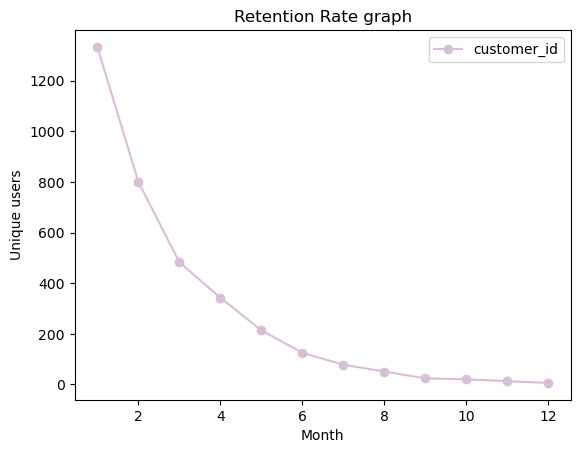

In [311]:
initial_users_count.plot(x="min_date", y="customer_id", color=['thistle', 'paleturquoise'], marker = 'o')
plt.title("Retention Rate graph")
plt.xlabel("Month")
plt.ylabel("Unique users")

In [312]:
df_view_ltv6

,customer_id,LTV6
0,1,5100.71
1,3,3540.63
2,5,2925.78
3,6,1033.27
4,8,1915.33
...,...,...
3026,3494,1537.95
3027,3495,3671.47
3028,3498,1954.47
3029,3499,2341.39


Text(0, 0.5, 'Clients, count')

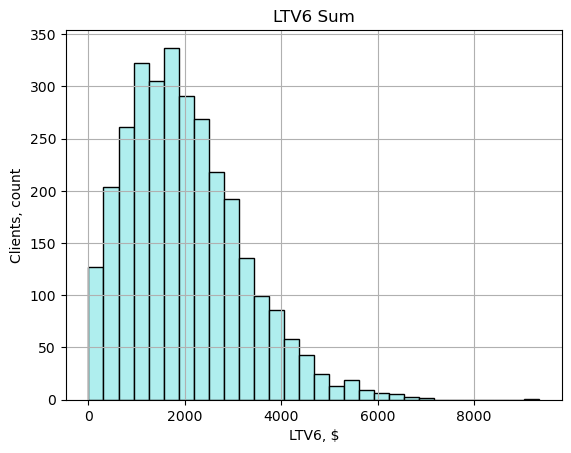

In [313]:
plt.title('LTV6 Sum')
df_view_ltv6['LTV6'].hist(bins = 30, edgecolor='black', color='paleturquoise')
plt.xlabel("LTV6, $")
plt.ylabel("Clients, count")

In [314]:
df_view_churn = df_view_churn.T

In [315]:
df_view_churn.rename(columns = {1: 'test'})

,0
mon_1,0.000000
mon_2,-57.503608
mon_3,-57.731214
mon_4,-61.047584
mon_5,-56.768402
mon_6,-51.755301
mon_7,-57.446809
mon_8,-53.678282
mon_9,-46.706989


In [316]:
df_view_churn

,0
mon_1,0.000000
mon_2,-57.503608
mon_3,-57.731214
mon_4,-61.047584
mon_5,-56.768402
mon_6,-51.755301
mon_7,-57.446809
mon_8,-53.678282
mon_9,-46.706989


Text(0, 0.5, 'User percentage')

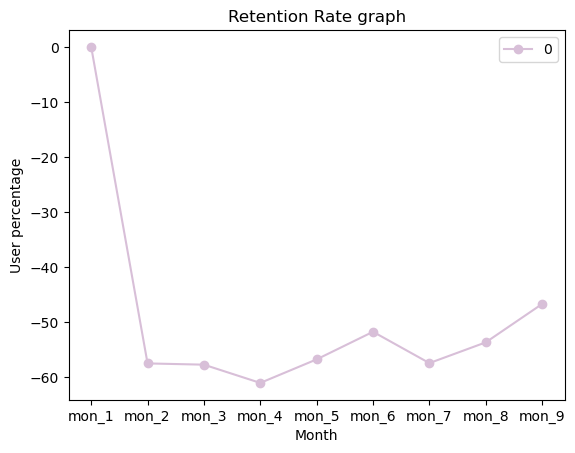

In [317]:
df_view_churn.plot(color=['thistle', 'paleturquoise'], marker = 'o')
plt.title("Retention Rate graph")
plt.xlabel("Month")
plt.ylabel("User percentage")

In [318]:
df_view_payback_brand

,brand,average_payback_brand
0,Giant Bicycles,3.710615
1,Norco Bicycles,3.845714
2,OHM Cycles,3.577982
3,Solex,3.566210
4,Trek Bicycles,3.451977
5,WeareA2B,4.049488


In [319]:
df_view_payback

,wealth_segment,average_payback
0,Affluent Customer,3.821727
1,High Net Worth,3.727110
2,Mass Customer,3.602334


In [320]:
#округлил

In [321]:
df_view_payback['average_payback'] = df_view_payback['average_payback'].round(1)

In [322]:
df_view_payback

,wealth_segment,average_payback
0,Affluent Customer,3.8
1,High Net Worth,3.7
2,Mass Customer,3.6


<function matplotlib.pyplot.show(close=None, block=None)>

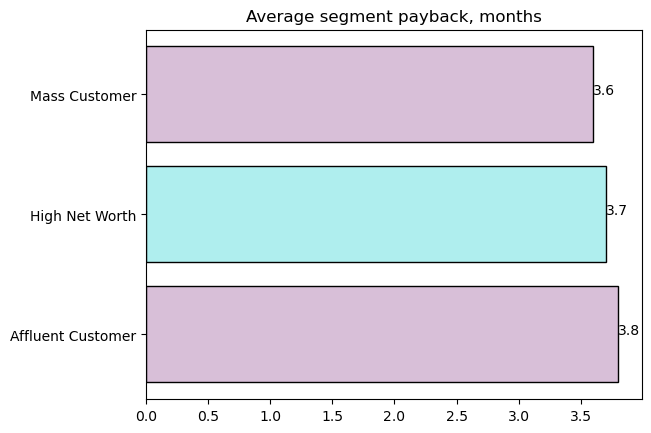

In [323]:
index = np.arange(3)
plt.title('Average segment payback, months')
plt.barh(df_view_payback['wealth_segment'], df_view_payback['average_payback'], color=['thistle', 'paleturquoise'], edgecolor='black')
for index, value in enumerate(df_view_payback['average_payback']):
    plt.text(value, index, str(value))
plt.show

In [324]:
#округлил

In [325]:
df_view_payback_brand['average_payback_brand'] = df_view_payback_brand['average_payback_brand'].round(1)

In [326]:
df_view_payback_brand

,brand,average_payback_brand
0,Giant Bicycles,3.7
1,Norco Bicycles,3.8
2,OHM Cycles,3.6
3,Solex,3.6
4,Trek Bicycles,3.5
5,WeareA2B,4.0


<function matplotlib.pyplot.show(close=None, block=None)>

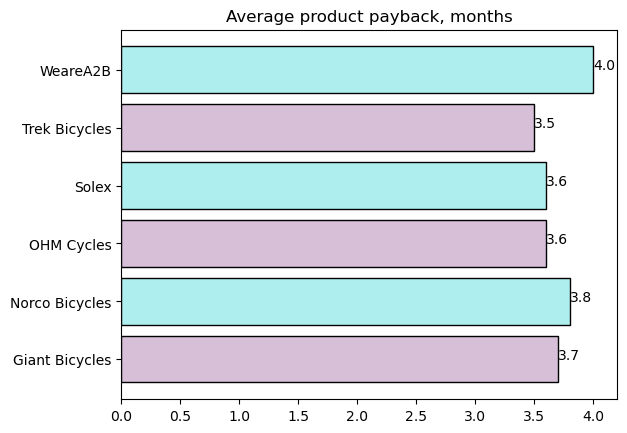

In [327]:
index = np.arange(6)
plt.title('Average product payback, months')
plt.barh(df_view_payback_brand['brand'], df_view_payback_brand['average_payback_brand'], color=['thistle', 'paleturquoise'], edgecolor='black')
for index, value in enumerate(df_view_payback_brand['average_payback_brand']):
    plt.text(value, index, str(value))
plt.show